# Data Cleaning

In [1]:
# loading the dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 40)

In [3]:
artists = pd.read_csv('artists.csv')
tracks = pd.read_csv('tracks.csv')

#artists = pd.read_csv('/content/drive/MyDrive/artists.csv')
#tracks = pd.read_csv('/content/drive/MyDrive/tracks.csv')

In [4]:
artists.head()

id  followers genres  \
0  0DheY5irMjBUeLybbCUEZ2        0.0     []   
1  0DlhY15l3wsrnlfGio2bjU        5.0     []   
2  0DmRESX2JknGPQyO15yxg7        0.0     []   
3  0DmhnbHjm1qw6NCYPeZNgJ        0.0     []   
4  0Dn11fWM7vHQ3rinvWEl4E        2.0     []   

                                             name  popularity  
0  Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  
1                                     ปูนา ภาวิณี           0  
2                                           Sadaa           0  
3                                       Tra'gruda           0  
4                          Ioannis Panoutsopoulos           0

In [5]:
tracks.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.674            0.7440     0.151    0.127  104.851               3  
1         0.797            0.0000     0.148    0.655  102.009               1  
2         0.994            0.0218     0.212    0.457  130.418               5  
3         0.995            0.9180     0.104    0.397  169.980               3  
4         0.989            0.1300     0.311    0.196  103.220               4

In [6]:
#add length of id to see if there's more than one artist
tracks['len artist id'] = [len(i) for i in tracks['id_artists']]

#drop tracks with more than one artist
tracks = tracks[tracks['len artist id'] <= 26]

tracks.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  key  loudness  mode  speechiness  \
0   1922-02-22         0.645  0.4450    0   -13.338     1       0.4510   
1   1922-06-01         0.695  0.2630    0   -22.136     1       0.9570   
2   1922-03-21         0.434  0.1770    1   -21.180     1       0.0512   
3   1922-03-21         0.321  0.0946    7   -27.961     1       0.0504   
4         1922         0.402  0.1580    3   -16.900     0       0.0390   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0         0.674            0.7440     0.151    0.127  104.851               3   
1         0.797            0.0000     0.148    0.655  102.009               1   
2         0.994            0.0218     0.212    0.457  130.418               5   
3         0.995            0.9180     0.104    0.397  169.980               3   
4         0.989            0.1300     0.311    0.196  103.220               4   

   len artist id  
0             26  
1             26  
2             26  
3             26  
4             26

In [7]:
#cleaning id_artists to match id of artists dataset
tracks['simplified_artist_id'] = [i.replace("['", '').replace("']", '') for i in tracks['id_artists']]

#merging datasets
tracks = tracks.merge(artists, left_on='simplified_artist_id', right_on='id')
tracks.head()

id_x    name_x  popularity_x  duration_ms  explicit  \
0  35iwgR4jXetI318WEWsa1Q     Carve             6       126903         0   
1  0PH9AACae1f957JAavhOl2  Lazy Boi             0       157333         0   
2  2SiNuAZ6jIU9xhClRKXcST    Sketch             0        87040         0   
3  4vV7uBcF2AnjNTOejBS5oL   L'enfer             0        40000         0   
4  598LlBn6jpEpVbLjmZPsYV  Graphite             0       104400         0   

   artists                  id_artists release_date  danceability   energy  \
0  ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22         0.645  0.44500   
1  ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22         0.298  0.46000   
2  ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22         0.634  0.00399   
3  ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22         0.657  0.32500   
4  ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22         0.644  0.68400   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    0   -13.338     1       0.4510         0.674             0.744    0.1510   
1    1   -18.645     1       0.4530         0.521             0.856    0.4360   
2    5   -29.973     0       0.0377         0.926             0.919    0.1050   
3   10   -14.319     0       0.2540         0.199             0.856    0.0931   
4    7    -8.247     1       0.1990         0.144             0.802    0.0847   

   valence    tempo  time_signature  len artist id    simplified_artist_id  \
0    0.127  104.851               3             26  45tIt06XoI0Iio4LBEVpls   
1    0.402   87.921               4             26  45tIt06XoI0Iio4LBEVpls   
2    0.396   79.895               4             26  45tIt06XoI0Iio4LBEVpls   
3    0.105   81.944               5             26  45tIt06XoI0Iio4LBEVpls   
4    0.138  100.031               4             26  45tIt06XoI0Iio4LBEVpls   

                     id_y  followers genres name_y  popularity_y  
0  45tIt06XoI0Iio4LBEVpls       91.0     []    Uli             4  
1  45tIt06XoI0Iio4LBEVpls       91.0     []    Uli             4  
2  45tIt06XoI0Iio4LBEVpls       91.0     []    Uli             4  
3  45tIt06XoI0Iio4LBEVpls       91.0     []    Uli             4  
4  45tIt06XoI0Iio4LBEVpls       91.0     []    Uli             4

In [8]:
#cleaning columns and column names
tracks.rename(columns={'id_x': 'track_id', 'name_x': 'track_name', 'popularity_x': 'track_popularity', 'simplified_artist_id': 'artist_id', 'name_y': 'artist_name', 'popularity_y': 'artist_popularity'}, inplace=True)
tracks.drop(['artists', 'id_artists', 'id_y', 'len artist id'], axis=1, inplace=True)
tracks

track_id         track_name  track_popularity  \
0       35iwgR4jXetI318WEWsa1Q              Carve                 6   
1       0PH9AACae1f957JAavhOl2           Lazy Boi                 0   
2       2SiNuAZ6jIU9xhClRKXcST             Sketch                 0   
3       4vV7uBcF2AnjNTOejBS5oL            L'enfer                 0   
4       598LlBn6jpEpVbLjmZPsYV           Graphite                 0   
...                        ...                ...               ...   
470033  0MmaEacabpK8Yp3Mdeo5uY                下雨天                50   
470034  1dKxf4Ht2SsKLyXfSDJAgy   The Cutest Puppy                67   
470035  0SjsIzJkZfDU7wlcdklEFR  John Brown's Song                66   
470036  5rgu12WBIHQtvej2MdHSH0                云与海                50   
470037  0NuWgxEp51CutD2pJoF4OM              blind                72   

        duration_ms  explicit release_date  danceability   energy  key  \
0            126903         0   1922-02-22         0.645  0.44500    0   
1            157333         0   1922-02-22         0.298  0.46000    1   
2             87040         0   1922-02-22         0.634  0.00399    5   
3             40000         0   1922-02-22         0.657  0.32500   10   
4            104400         0   1922-02-22         0.644  0.68400    7   
...             ...       ...          ...           ...      ...  ...   
470033       265846         0   2020-02-25         0.528  0.67300    4   
470034        82500         0   2020-10-30         0.609  0.01720    8   
470035       185250         0   2020-03-20         0.562  0.03310    1   
470036       258267         0   2020-09-26         0.560  0.51800    0   
470037       153293         0   2020-10-21         0.765  0.66300    0   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0        -13.338     1       0.4510         0.674          0.744000    0.1510   
1        -18.645     1       0.4530         0.521          0.856000    0.4360   
2        -29.973     0       0.0377         0.926          0.919000    0.1050   
3        -14.319     0       0.2540         0.199          0.856000    0.0931   
4         -8.247     1       0.1990         0.144          0.802000    0.0847   
...          ...   ...          ...           ...               ...       ...   
470033    -3.639     1       0.0314         0.143          0.000000    0.0989   
470034   -28.573     1       0.1180         0.996          0.973000    0.1080   
470035   -25.551     1       0.1030         0.996          0.961000    0.1110   
470036    -7.471     0       0.0292         0.785          0.000000    0.0648   
470037    -5.223     1       0.0652         0.141          0.000297    0.0924   

        valence    tempo  time_signature               artist_id  followers  \
0         0.127  104.851               3  45tIt06XoI0Iio4LBEVpls       91.0   
1         0.402   87.921               4  45tIt06XoI0Iio4LBEVpls       91.0   
2         0.396   79.895               4  45tIt06XoI0Iio4LBEVpls       91.0   
3         0.105   81.944               5  45tIt06XoI0Iio4LBEVpls       91.0   
4         0.138  100.031               4  45tIt06XoI0Iio4LBEVpls       91.0   
...         ...      ...             ...                     ...        ...   
470033    0.297  130.066               4  5VGgFE9nPgMfEnYiPT5J2B      929.0   
470034    0.890   68.619               4  7vgGpuiXdNlCmc994PlMlz       23.0   
470035    0.386   63.696               3  4MxqhahGRT4BPz1PilXGeu       91.0   
470036    0.211  131.896               4  1QLBXKM5GCpyQQSVMNZqrZ      896.0   
470037    0.686  150.091               4  1dy5WNgIKQU6ezkpZs4y8z   245944.0   

                                                   genres     artist_name  \
0                                                      []             Uli   
1                                                      []             Uli   
2                                                      []             Uli   
3                                                 

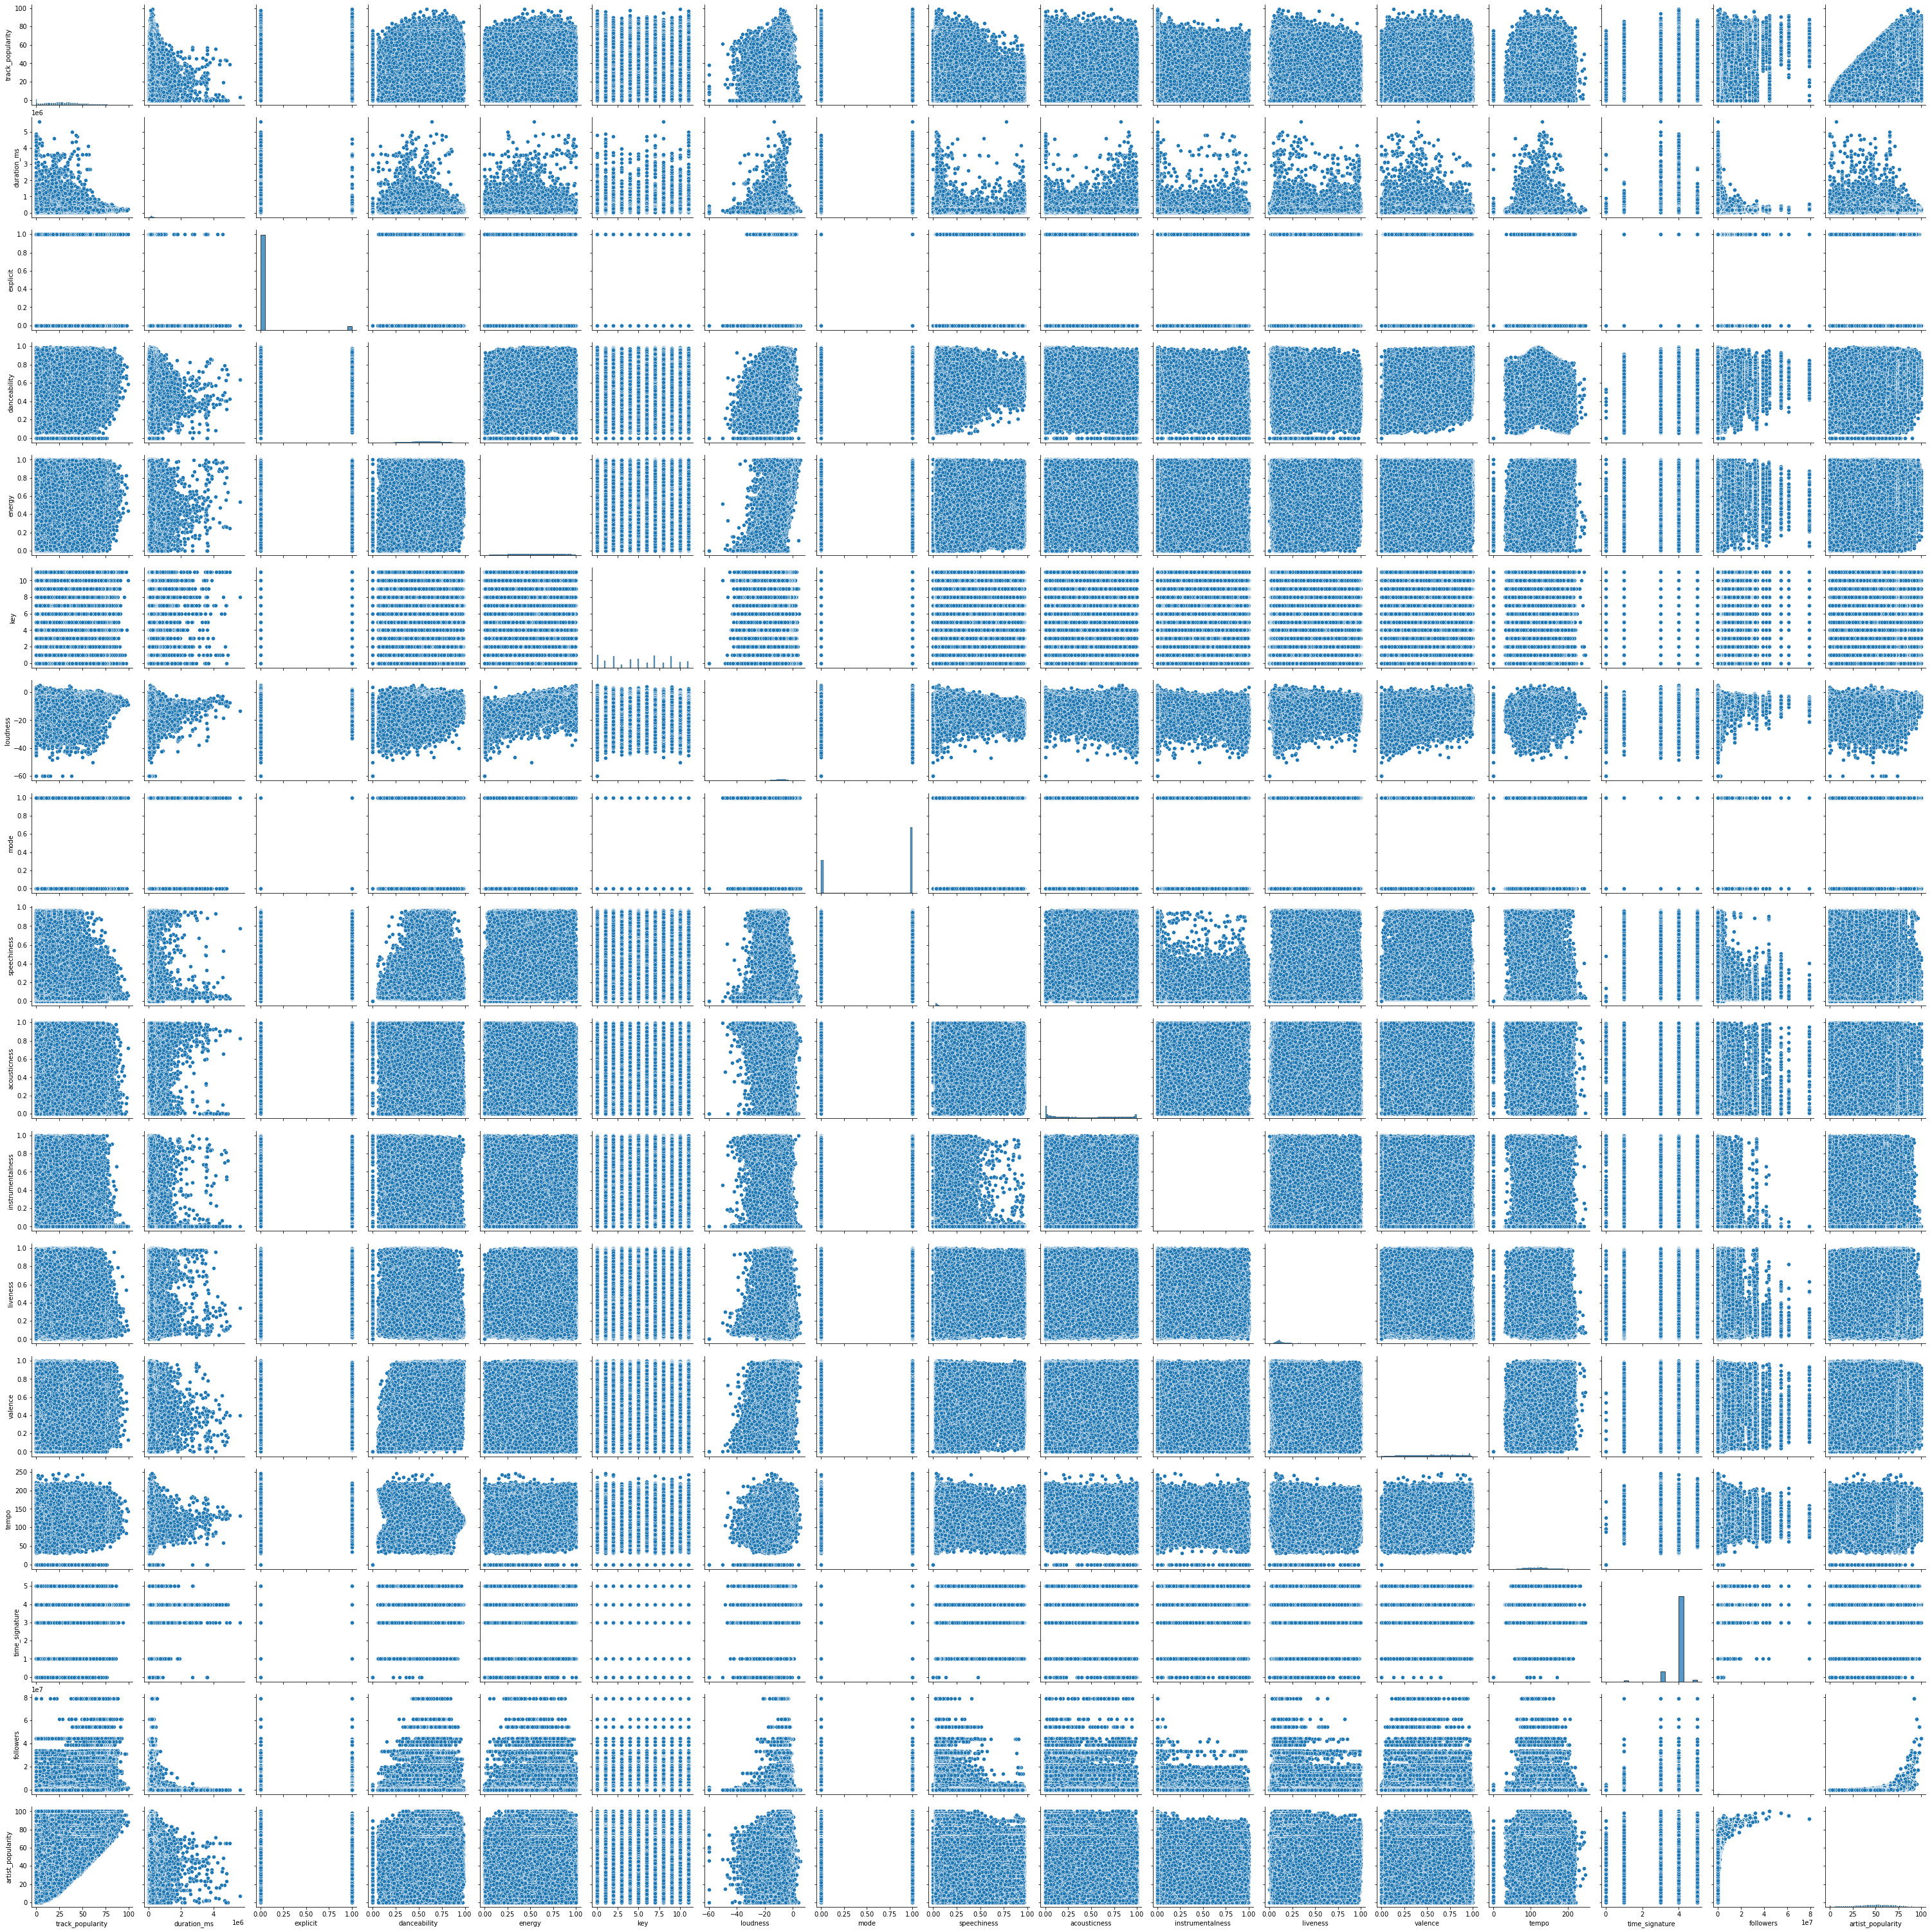

In [9]:
sns.pairplot(tracks, kind = 'scatter')

In [10]:
tracks.columns

Index(['track_id', 'track_name', 'track_popularity', 'duration_ms', 'explicit',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'artist_id', 'followers',
       'genres', 'artist_name', 'artist_popularity'],
      dtype='object')

In [11]:
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1 #we added intercept
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns).sort_values(ascending = False)

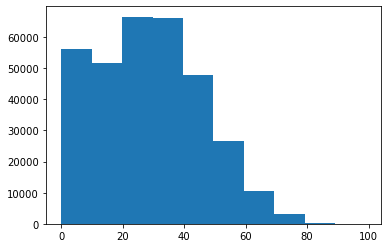

In [21]:
from sklearn.model_selection import train_test_split
plt.hist(train['track_popularity'])
#Probably will make a break along the lines of 40 track popularity for 1/0 for logistic regression model
#since it's a 50/50 ish split
tracks['over40'] = (tracks['track_popularity'] > 40).astype(int)
tracks

train, test = train_test_split(tracks, test_size=0.3)

In [22]:
dropped = ['track_id', 'track_name', 'track_popularity', 'artist_id', 'release_date', 'artist_name', 'genres']
train.drop(dropped, axis = 1)

duration_ms  explicit  danceability  energy  key  loudness  mode  \
176088       332320         0         0.522   0.567    8    -7.047     1   
237504       350760         0         0.852   0.505   10    -8.888     0   
403128       242493         0         0.542   0.334    6   -11.178     0   
466606       200120         0         0.816   0.772   11    -8.954     0   
233219       201538         0         0.812   0.868    2    -4.695     1   
...             ...       ...           ...     ...  ...       ...   ...   
209913       193440         0         0.419   0.983    1    -4.073     0   
262847       175013         0         0.556   0.902    4    -5.143     1   
337862       165027         0         0.660   0.947    8    -2.328     0   
300711       240973         0         0.501   0.912    7    -4.746     1   
183862       223693         1         0.709   0.915    7    -5.743     1   

        speechiness  acousticness  instrumentalness  liveness  valence  \
176088       0.0300      0.627000          0.000000    0.1070    0.272   
237504       0.0434      0.579000          0.000000    0.0678    0.930   
403128       0.0425      0.526000          0.000000    0.1190    0.515   
466606       0.0382      0.085400          0.000000    0.0560    0.812   
233219       0.0519      0.093600          0.000000    0.3710    0.744   
...             ...           ...               ...       ...      ...   
209913       0.0389      0.000583          0.000081    0.1630    0.946   
262847       0.0449      0.000092          0.000000    0.0888    0.960   
337862       0.0378      0.044200          0.000012    0.1860    0.673   
300711       0.0576      0.000843          0.000141    0.4150    0.694   
183862       0.2370      0.022600          0.000282    0.2210    0.576   

          tempo  time_signature   followers  artist_popularity  over40  
176088   97.825               4    428007.0                 63       0  
237504  131.036               4   4490658.0                 79       1  
403128  132.020               4     10753.0                 27       0  
466606  120.472               4       202.0                 27       0  
233219  108.947               4    703969.0                 61       1  
...         ...             ...         ...                ...     ...  
209913  147.584               4  12001735.0                 83       1  
262847  145.914               4  20934285.0                 90       1  
337862  127.997               4    150867.0                 64       0  
300711  159.991               4    114986.0                 50       0  
183862   91.611               4   3406294.0                 70       1  

[329026 rows x 17 columns]

In [23]:
VIF(train.drop(dropped, axis = 1), train.drop(dropped, axis = 1).columns)

energy               4.262768
loudness             2.723882
acousticness         2.196299
valence              1.732107
danceability         1.640206
artist_popularity    1.446430
speechiness          1.309414
over40               1.271691
followers            1.231390
instrumentalness     1.148507
liveness             1.141703
tempo                1.101980
duration_ms          1.085343
explicit             1.069725
time_signature       1.068485
mode                 1.027225
key                  1.018599
dtype: float64

In [24]:
dropped.append('energy')
dropped.append('artist_popularity')
VIF(train.drop(dropped, axis = 1), train.drop(dropped, axis = 1).columns)

danceability        1.608157
valence             1.528254
loudness            1.513804
acousticness        1.397510
speechiness         1.258280
over40              1.154267
liveness            1.106539
instrumentalness    1.104085
tempo               1.098256
duration_ms         1.081099
explicit            1.069522
time_signature      1.063495
followers           1.056737
mode                1.025055
key                 1.018489
dtype: float64

This seems reasonable to have for my model. We will cut down more columns if they are statistically not significant or otherwise don't help our model.

In [25]:
def get_cols(df):
    st = ''
    for item in df.columns:
        st += item + " + "
    return st
get_cols(train.drop(dropped, axis = 1))

'duration_ms + explicit + danceability + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + time_signature + followers + over40 + '

# Modeling

In [26]:
import statsmodels.formula.api as smf

logit = smf.logit(formula='over40 ~ duration_ms + explicit + danceability + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + time_signature + followers', 
                 data=train).fit()

print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.492195
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 over40   No. Observations:               329026
Model:                          Logit   Df Residuals:                   329011
Method:                           MLE   Df Model:                           14
Date:                Wed, 03 May 2023   Pseudo R-squ.:                  0.1265
Time:                        23:51:37   Log-Likelihood:            -1.6194e+05
converged:                       True   LL-Null:                   -1.8539e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7216      0.058    -12.391      0.000      -0.836      -0.607
duration_ms

In [27]:
test

track_id  \
446372  4o2nK4Qqr0uqyFQ2jHUyFA   
207275  4Lt2joCvb5Y1hI3ze2Gz0d   
329284  5csE0x7q6T88ds5mYOpfZe   
405312  3dvPPS5KXskeRbrSY80gwt   
184359  4hq9sVvALE0Oi0O39gm6ko   
...                        ...   
84013   1JIzFhI9Lt5FyslawmHCBi   
99913   23dC4zCpB1bnLzBxAXDLD7   
221716  4vorIG9QC6TG5J5HtO8Boc   
73309   3v85BrHUuCDd7Xwp04vMzB   
160509  7HkqfBOkl4ahn0OerQVbCh   

                                              track_name  track_popularity  \
446372  S' gaat wiiter mit De Pöschtler Schmid im Spital                22   
207275                        Get Ready - Orchestral Mix                41   
329284                            Nous Souviendrons Nous                23   
405312                                          It`s you                57   
184359               We Could Be Together - Campfire Mix                22   
...                                                  ...               ...   
84013                         Five Years - 2012 Remaster                59   
99913                                      Bedroom Thang                32   
221716                              What's My Age Again?                43   
73309                                   I Know You Rider                14   
160509                                    Heartbreak Kid                33   

        duration_ms  explicit release_date  danceability  energy  key  \
446372       223680         0   1997-02-27         0.697   0.177    1   
207275       326558         0   1992-02-24         0.829   0.890    9   
329284       311573         0   1991-01-01         0.230   0.104    1   
405312       219506         0   2018-06-20         0.380   0.417    2   
184359       335200         0   1989-01-10         0.755   0.248    3   
...             ...       ...          ...           ...     ...  ...   
84013        283753         0   1972-06-06         0.460   0.326    7   
99913        279840         0   1970-01-16         0.466   0.406    7   
221716       148373         0   1999-06-01         0.395   0.955    6   
73309        143747         0   1964-11-04         0.712   0.419    7   
160509       319840         0   1987-09-21         0.411   0.580    5   

        loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
446372   -17.911     1       0.9010      0.763000          0.000000    0.3470   
207275    -8.221     1       0.0523      0.000714          0.023600    0.0760   
329284   -21.607     1       0.0387      0.938000          0.017200    0.1110   
405312    -7.861     1       0.0317      0.722000          0.000000    0.0864   
184359   -13.446     1       0.0417      0.741000          0.000000    0.1080   
...          ...   ...          ...           ...               ...       ...   
84013    -10.699     1       0.0417      0.142000          0.000010    0.0449   
99913    -13.378     1       0.0539      0.187000          0.671000    0.1050   
221716    -7.395     1       0.0737      0.015700          0.000414    0.0890   
73309     -8.276     1       0.0261      0.650000          0.000007    0.0722   
160509    -5.557     1       0.0285      0.026600          0.000344    0.2880   

        valence    tempo  time_signature               artist_id  followers  \
446372   0.5170  136.082               5  7p5EwRiUqxJxnOCcULTHex     6155.0   
207275   0.7190  124.886               4  18JD8DVlD1fakDAw7E9LFC   159288.0   
329284   0.0967   75.199               4  0e04xgVBPU6mE2QkSHlufD   305508.0   
405312   0.2580  130.622               4  2l9aF9jOgB7GI1uyNkx836   226444.0   
184359   0.6890  134.597               4  18jZvCsW1PJ4FDQ5gEXuKp   346869.0   
...         ...      ...             ...                     ...        ...   
84013    0.3210  152.531               3  0oSGxfWSnnOXhD2fKuz2Gy  6753696.0   
99913    0.7700  148.598               3  2AM4ilv6UzW0uMRuqKtDgN  2985004.0   
221716   0.4720  157.653               4  6FBDaR13swtiWwGhX1WQsP  6424396.0   
73309    0.6550  106.595            

# Evaluation

In [28]:
from sklearn.metrics import confusion_matrix

To remind you of what each element of the confusion matrix represents:

TN FP

FN TP

In [41]:
y_test = test['over40']
y_prob = logit.predict(test.drop(dropped, axis = 1))
y_pred = pd.Series([1 if x > 0.35 else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 
def accuracy(cm):
    return (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
def tpr(cm):
    return (cm.ravel()[3]/(cm.ravel()[3] + cm.ravel()[2]))
def fpr(cm):
    return (cm.ravel()[1]/(cm.ravel()[1] + cm.ravel()[0]))
print('Accuracy: ' + str(accuracy(cm)))
print('TPR: ' + str(tpr(cm)))
print('FPR: ' + str(fpr(cm)))

Confusion Matrix : 
 [[90928 14683]
 [19453 15948]]
Accuracy: 0.7579213116614189
TPR: 0.4504957487076636
FPR: 0.13902907841039286


### Logistic Regression Model

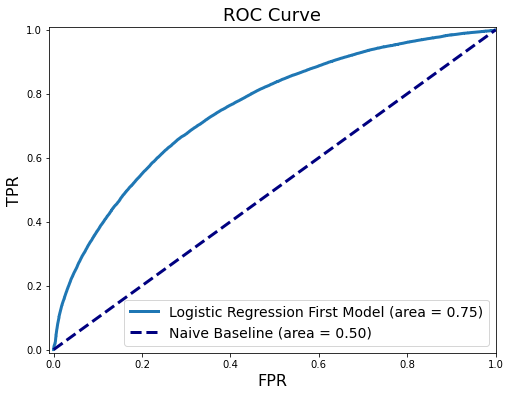

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _mod = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression First Model (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()